In [10]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import reservoirpy as rp
from reservoirpy.nodes import Reservoir, Ridge, Input
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
from sklearn.metrics import accuracy_score

In [11]:
# librairies display version
print(pd.__version__,mpl.__version__,sns.__version__,tf.__version__,np.__version__)


1.5.3 3.7.1 0.13.0 2.13.1 1.24.2


In [12]:
df = pd.read_csv('data.csv')

# remove the date column
date_time = df.pop('date')

Y = df.pop('incidents')
X = df


In [13]:
df.head()

,"('temperature', 'mean')","('temperature', 'max')","('temperature', 'min')","('humidite', 'mean')","('humidite', 'max')","('humidite', 'min')","('nuages', 'mean')","('nuages', 'max')","('nuages', 'min')"
0,8.407479,10.476465,5.921381,86.976287,96.8684,72.3197,88.009513,100.0,46.87500
1,10.482559,13.003564,8.543604,89.939588,96.2094,81.1347,91.015629,100.0,35.93750
2,10.108455,12.519678,8.909326,94.035604,97.8528,89.3497,95.084633,100.0,67.18750
3,8.958734,12.460107,5.731348,86.352908,92.5699,68.4599,73.518883,100.0,0.00000
4,7.104425,8.300439,5.926172,90.596867,96.4792,78.9225,66.927081,100.0,5.46875


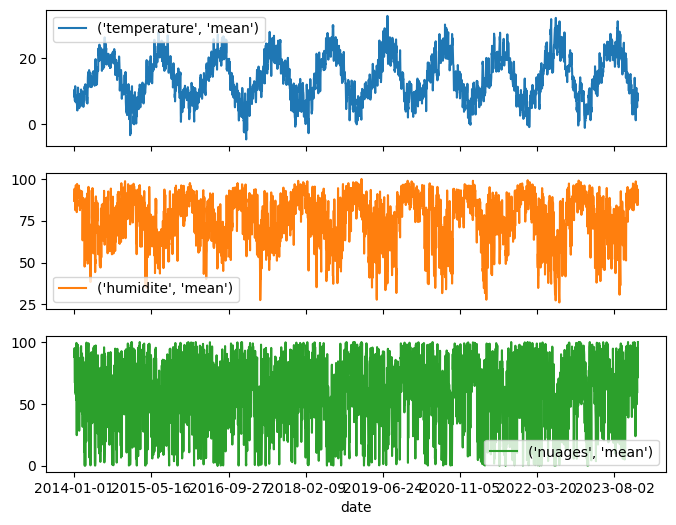

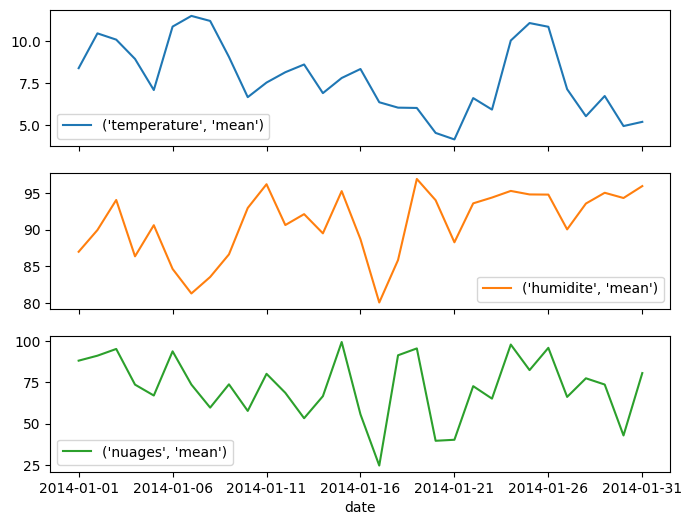

In [14]:
plot_cols = ["('temperature', 'mean')", "('humidite', 'mean')", "('nuages', 'mean')"]
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:31]
plot_features.index = date_time[:31]
_ = plot_features.plot(subplots=True)

In [21]:
# split train and test (test = last 300 days, train = rest)
# X = ('temperature', 'mean')	('temperature', 'max')	('temperature', 'min')	('humidite', 'mean')	('humidite', 'max')	('humidite', 'min')	('nuages', 'mean')	('nuages', 'max')	('nuages', 'min')
# Y = incidents (0 or 1 or 2)
train_df = df[:-300]
test_df = df[-300:]
train_labels = Y[:-300]
test_labels = Y[-300:]

# normalize data
train_mean = train_df.mean()
train_std = train_df.std()
train_df = (train_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

train_data = np.array(train_df)
train_labels = np.array(train_labels)
test_data = np.array(test_df)
test_labels = np.array(test_labels)
# transform labels to one hot
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)


print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)


(3353, 9)
(3353, 3)
(300, 9)
(300, 3)


In [23]:
# create a model to predict if today is a risky day, very risky day or not (0, 1, 2) using reservoirpy

# create a reservoir
source = Input()
reservoir = Reservoir(500, sr=0.9, lr=0.1)
readout = Ridge(ridge=1e-6)

model = [source >> reservoir, source] >> readout

Y_pred = model.fit(train_data, train_labels, stateful=False, warmup=2).run(test_data, stateful=False)



Running Model-7: 3353it [00:00, 5032.78it/s]<?, ?it/s]
Running Model-7: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]


Fitting node Ridge-3...


Running Model-7: 300it [00:00, 6397.33it/s]           


In [24]:
print(Y_pred)

[[ 1.72559038e+00 -7.91504071e-01  6.59091825e-02]
 [ 1.48181031e+00 -5.27497998e-01  4.56847427e-02]
 [ 1.26346042e+00 -3.26637371e-01  6.31752997e-02]
 [ 1.01159230e+00 -6.12466591e-02  4.96537111e-02]
 [ 8.94712016e-01  4.99515897e-02  5.53364234e-02]
 [ 8.56108398e-01 -6.35914859e-03  1.50251100e-01]
 [ 7.91734549e-01  5.57654359e-02  1.52500587e-01]
 [ 7.93542416e-01  4.15747569e-02  1.64883524e-01]
 [ 6.88107660e-01  7.01763277e-02  2.41716691e-01]
 [ 7.18483564e-01 -4.81976292e-02  3.29714582e-01]
 [ 7.71290463e-01 -1.09543261e-01  3.38253246e-01]
 [ 8.33798673e-01 -1.86275330e-01  3.52476912e-01]
 [ 1.01798676e+00 -3.14640503e-01  2.96653879e-01]
 [ 1.05799658e+00 -3.14319902e-01  2.56323237e-01]
 [ 1.07048012e+00 -2.84315797e-01  2.13835506e-01]
 [ 1.05812473e+00 -3.44463798e-01  2.86338810e-01]
 [ 9.49209348e-01 -2.32919106e-01  2.83709321e-01]
 [ 1.05726484e+00 -3.04998389e-01  2.47732961e-01]
 [ 9.49733464e-01 -2.43809436e-01  2.94075280e-01]
 [ 1.04669830e+00 -3.06799198e-

AxisError: axis 1 is out of bounds for array of dimension 1